In [76]:
import matplotlib.pyplot as plt
import json
import numpy as np


results = {}
# Read json file
with open('../results/training/20220908-11:54.json') as json_file:
    results = json.load(json_file)
    results = json.loads(results)

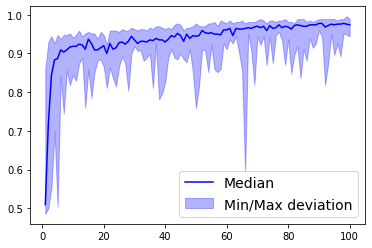

In [77]:

resolution = 8
size = 1.0
scale = 0.1
series_length = 1

metric = "val_accuracy"

values = np.array([results[str(resolution)][str(size)][str(scale)][str(series_length)][0][metric]])
for i in range(1, len(results["8"]["1.0"]["0.1"]["1"])):
    values = np.concatenate((values, [results[str(resolution)][str(size)][str(scale)][str(series_length)][i][metric]]), 0)

median = np.median(values, axis=0)
min = np.min(values, axis=0)
max = np.max(values, axis=0)

plt.plot(range(1, len(median)+1), median, color="blue")
plt.fill_between(range(1, len(median)+1), min, max, color="blue", alpha=0.3)
plt.legend(["Median", "Min/Max deviation"], loc="lower right", fontsize=14)
plt.show()
